# Hierarchical Clustering on Iris Dataset
This notebook demonstrates hierarchical clustering (agglomerative clustering) on the classic Iris dataset, including dendrogram visualization and 2D cluster plotting.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Iris Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Select features for clustering (petal length and petal width)
X = df[['petal length (cm)', 'petal width (cm)']]
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head()

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444


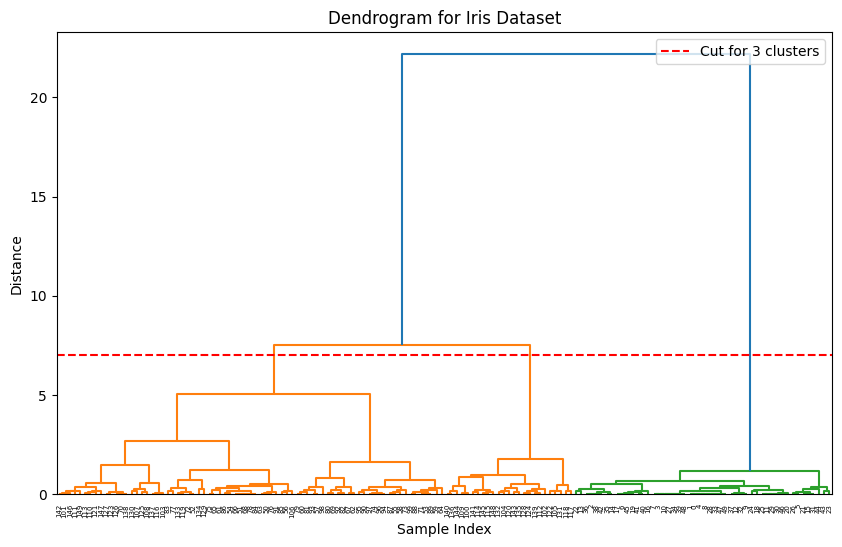

In [7]:
# Create Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
# Draw a horizontal line to show the cut for 3 clusters
plt.axhline(y=7, color='r', linestyle='--', label='Cut for 3 clusters')
plt.title('Dendrogram for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [5]:
# Fit Agglomerative Clustering and Assign Cluster Labels
# Let's choose 3 clusters based on the dendrogram
cluster_labels = fcluster(linked, 3, criterion='maxclust')
df['cluster'] = cluster_labels
df[['petal length (cm)', 'petal width (cm)', 'cluster']].head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


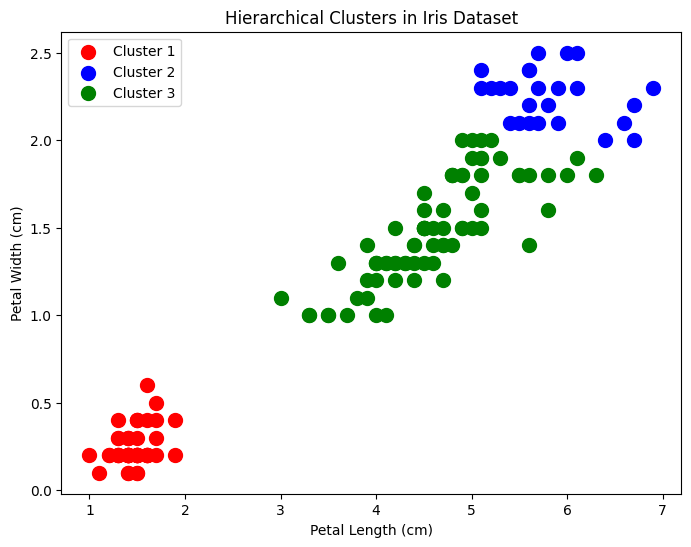

In [6]:
# Visualize Clusters in 2D
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green']
for i, color in zip(range(1, 4), colors):
    plt.scatter(X.values[cluster_labels == i, 0], X.values[cluster_labels == i, 1],
                s=100, c=color, label=f'Cluster {i}')
plt.title('Hierarchical Clusters in Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()